# Convelution Neural Networks on Mnist Dataset


Objective : Wokring with Keras and Experiment with Different Convelution Nueral Network Architectures.

Dataset : Mnist DataSet which is avialalbe in Keras Dataset by default.

Developer Details : PraveenAI

Source Details : Most of the code is extracted from my learnings with Keras https://keras.io/losses/ and Base Archictural Refference is from"https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py"


In [0]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,MaxPooling2D
from keras.losses import categorical_crossentropy

**Load Dataset**

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

11493376/11490434 [==============================] - 0s 0us/step
Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


**Reshaping the Image to input to the Conv2D**

In [0]:
#input image dimensions
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
input_shape = (img_rows, img_cols, 1)                              #(60000,28, 28, 1) input the 1st layer Conv2d



#Conv2D Accepts 4-D array #(no row, x,y,z) = (60000,28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) #4d X_train
x_test  = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)   #4d x_train


x_train = x_train/255
x_test =  x_test/ 255

In [6]:
#dimensions of train and test
print('x_train shape:>> ', x_train.shape)
print('train samples:>> ', x_train.shape[0])
print('test samples :>> ', x_test.shape[0])

x_train shape:>>  (60000, 28, 28, 1)
train samples:>>  60000
test samples :>>  10000


**Converting the labels to Categorical**

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(y_train.shape)

(60000, 10)


**Initializing the CNN Params** 

In [0]:
batch_size = 128
num_classes = 10
epochs = 12
Total_SUMRY = {}

### Plot Train Los and Test Loss Vs Epochs

In [0]:
%matplotlib inline
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# Architecture 1 :64-28-12(3 Convlution Layers with 64,28,12  + Dense softmax)

> **3-CNN - relu ,  1-Dense + relu activation + AdamOtpimizer **

In [10]:
model_1 = Sequential()
model_1.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(28,kernel_size=(3,3),padding='same',activation='relu'))
model_1.add(Dropout(0.35))
model_1.add(Conv2D(12,kernel_size=(3,3),padding='same',activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Flatten())
model_1.add(Dense(num_classes,activation='softmax'))
model_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 28)        16156     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [13]:
model_1.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history = model_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0379 - acc: 0.9884 - val_loss: 0.0260 - val_acc: 0.9910
Epoch 2/12
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0351 - acc: 0.9888 - val_loss: 0.0290 - val_acc: 0.9902
Epoch 3/12
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0344 - acc: 0.9890 - val_loss: 0.0241 - val_acc: 0.9920
Epoch 4/12
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0320 - acc: 0.9894 - val_loss: 0.0238 - val_acc: 0.9922
Epoch 5/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0316 - acc: 0.9899 - val_loss: 0.0258 - val_acc: 0.9914
Epoch 6/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0310 - acc: 0.9903 - val_loss: 0.0245 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0293 - acc: 0.9905 - val_loss: 0.0253 - 

Test score   : 0.023471647653033143
Test accuracy: 0.9925
Train accuracy: 0.9976


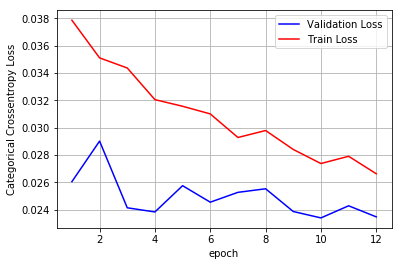

In [16]:
score1_tst = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score   :', score1_tst[0]) 
print('Test accuracy:', score1_tst[1])

score1_trn = model_1.evaluate(x_train, y_train, verbose=0) 
print('Train accuracy:', score1_trn[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#["Model", "#ConvLayers", "size of Convnets","#Maxpool","size of Maxpool","#Dropout","Dense","Test ACC","Train ACC"]
Total_SUMRY[1]=["Model1", "3", "64-28-12" ,"1","2","3","1",score1_trn[1],score1_tst[1]]

# Architecture 2 :60-40-28-14-8(5 Convlution Layers  + 1 Dense softmax)

> **5-CNN - relu ,  1-Dense + relu activation + AdamOtpimizer **

In [32]:
model_2 = Sequential()
model_2.add(Conv2D(60,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
model_2.add(Dropout(0.25))
model_2.add(MaxPooling2D(pool_size=(2,2)))


model_2.add(Conv2D(40,kernel_size=(3,3),padding='same',activation='relu'))
model_2.add(Dropout(0.35))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(28,kernel_size=(3,3),padding='same',activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling2D(pool_size=(2, 2)))


model_2.add(Conv2D(14,kernel_size=(3,3),padding='same',activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(0.55))

model_2.add(Conv2D(8,kernel_size=(2,2),padding='same',activation='relu'))
model_2.add(Dropout(0.6))

model_2.add(Flatten())
model_2.add(Dense(num_classes,activation='softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 28, 28, 60)        600       
_________________________________________________________________
dropout_60 (Dropout)         (None, 28, 28, 60)        0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 14, 14, 40)        21640     
_________________________________________________________________
dropout_61 (Dropout)         (None, 14, 14, 40)        0         
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 7, 7, 40)          0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 7, 7, 28)          10108     
__________

In [33]:
model_2.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history = model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 167s 3ms/step - loss: 1.9895 - acc: 0.2383 - val_loss: 1.6275 - val_acc: 0.6913
Epoch 2/12
60000/60000 [==============================] - 166s 3ms/step - loss: 1.6871 - acc: 0.3619 - val_loss: 1.3396 - val_acc: 0.6544
Epoch 3/12
60000/60000 [==============================] - 167s 3ms/step - loss: 1.5815 - acc: 0.3926 - val_loss: 1.1770 - val_acc: 0.6273
Epoch 4/12
60000/60000 [==============================] - 163s 3ms/step - loss: 1.5396 - acc: 0.4046 - val_loss: 1.1827 - val_acc: 0.6150
Epoch 5/12
60000/60000 [==============================] - 163s 3ms/step - loss: 1.5066 - acc: 0.4120 - val_loss: 1.1027 - val_acc: 0.6308
Epoch 6/12
60000/60000 [==============================] - 163s 3ms/step - loss: 1.4927 - acc: 0.4139 - val_loss: 1.0767 - val_acc: 0.6341
Epoch 7/12
60000/60000 [==============================] - 164s 3ms/step - loss: 1.4812 - acc: 0.4189 - val_loss: 1.0699 - 

Test score   : 0.9442845161437988
Test accuracy: 0.6492
Train score   : 0.952399647585551
Train accuracy: 0.64605


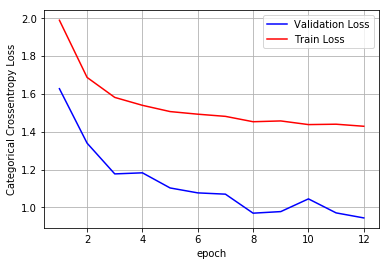

In [36]:
score2_tst = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score   :', score2_tst[0]) 
print('Test accuracy:', score2_tst[1])

score2_trn = model_2.evaluate(x_train, y_train, verbose=0) 
print('Train score   :', score2_trn[0]) 
print('Train accuracy:', score2_trn[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


#["Model", "#ConvLayers", "size of Convnets","#Maxpool","size of Maxpool","#Dropout","Dense","Test ACC","Train ACC"]
Total_SUMRY[2]=["Model2", "5", "60-40-28-14-8" ,"5","2-2-2-2","4","1",score2_trn[1],score2_tst[1]]

# Architecture 3 :80-70-50-30-20-16-4(5 Convlution Layers +  2 Dense softmax)

> **7-CNN - relu ,  2-Dense + relu activation + AdamOtpimizer **

In [37]:
model_3 = Sequential()
model_3.add(Conv2D(80,kernel_size=(5,5),padding='same',activation='relu',input_shape=input_shape))
model_3.add(MaxPool2D(pool_size=(3, 3)))

model_3.add(Conv2D(70,kernel_size=(3,3),padding='same',activation='relu'))
model_3.add(Dropout(0.35))


model_3.add(Conv2D(50,kernel_size=(3,3),padding='same',activation='relu'))
model_3.add(Dropout(0.35))

model_3.add(Conv2D(30,kernel_size=(3,3),padding='same',activation='relu'))
model_3.add(Dropout(0.4))

model_3.add(Conv2D(20,kernel_size=(3,3),padding='same',activation='relu'))
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(0.5))


model_3.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Conv2D(8,kernel_size=(3,3),padding='same',activation='relu'))
model_3.add(Dropout(0.55))

model_3.add(Flatten())
model_3.add(Dense(100,activation='relu'))
model_3.add(Dropout(0.7))

model_3.add(Dense(num_classes,activation='softmax'))
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 28, 28, 80)        2080      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 9, 9, 80)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 9, 9, 70)          50470     
_________________________________________________________________
dropout_65 (Dropout)         (None, 9, 9, 70)          0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 9, 9, 50)          31550     
_________________________________________________________________
dropout_66 (Dropout)         (None, 9, 9, 50)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 9, 9, 30)          13530     
__________

In [38]:
model_3.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history = model_3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 210s 3ms/step - loss: 1.8028 - acc: 0.3186 - val_loss: 0.8207 - val_acc: 0.6794
Epoch 2/12
60000/60000 [==============================] - 207s 3ms/step - loss: 0.8048 - acc: 0.7117 - val_loss: 0.3639 - val_acc: 0.8787
Epoch 3/12
60000/60000 [==============================] - 207s 3ms/step - loss: 0.4371 - acc: 0.8850 - val_loss: 0.1275 - val_acc: 0.9675
Epoch 4/12
60000/60000 [==============================] - 206s 3ms/step - loss: 0.2972 - acc: 0.9278 - val_loss: 0.0920 - val_acc: 0.9773
Epoch 5/12
60000/60000 [==============================] - 206s 3ms/step - loss: 0.2478 - acc: 0.9402 - val_loss: 0.1049 - val_acc: 0.9757
Epoch 6/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.2102 - acc: 0.9494 - val_loss: 0.0647 - val_acc: 0.9836
Epoch 7/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.1876 - acc: 0.9559 - val_loss: 0.0723 - 

Test score   : 0.05256174960960634
Test accuracy: 0.9869
Train score   : 0.046337916914901384
Train accuracy: 0.9887833333333333


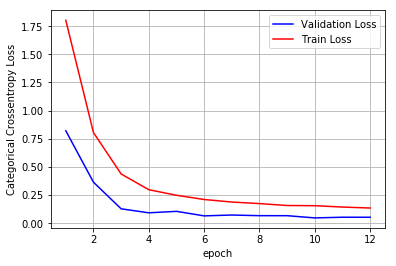

In [41]:
score3_tst = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score   :', score3_tst[0]) 
print('Test accuracy:', score3_tst[1])

score3_trn = model_3.evaluate(x_train, y_train, verbose=0) 
print('Train score   :', score3_trn[0]) 
print('Train accuracy:', score3_trn[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#["Model", "#ConvLayers", "size of Convnets","#Maxpool","size of Maxpool","#Dropout","Dense","Test ACC","Train ACC"]
Total_SUMRY[3]=["Model3", "7", "80-70-50-30-20-16-4" ,"2","3-2","4","2",score3_trn[1],score3_tst[1]]

In [43]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "#ConvLayers", "size of Convnets","#Maxpool","size of Maxpool","Dropout","Dense","Test ACC","Train ACC"]
for i,j in enumerate(Total_SUMRY):
  x.add_row([Total_SUMRY[j][0],Total_SUMRY[j][1],Total_SUMRY[j][2],Total_SUMRY[j][3],Total_SUMRY[j][4],Total_SUMRY[j][5],Total_SUMRY[j][6],Total_SUMRY[j][7],Total_SUMRY[j][8]])
  #print(Total_SUMRY[j][0]," = ",Total_SUMRY[j][1]," = ",Total_SUMRY[j][2]," = ",Total_SUMRY[j][3]," = ",Total_SUMRY[j][4]," = ",Total_SUMRY[j][5]," = ",Total_SUMRY[j][6]," = ",Total_SUMRY[j][7])    
print(x)


+--------+-------------+---------------------+----------+-----------------+---------+-------+--------------------+-----------+
| Model  | #ConvLayers |   size of Convnets  | #Maxpool | size of Maxpool | Dropout | Dense |      Test ACC      | Train ACC |
+--------+-------------+---------------------+----------+-----------------+---------+-------+--------------------+-----------+
| Model1 |      3      |       64-28-12      |    1     |        2        |    3    |   1   |       0.9976       |   0.9925  |
| Model2 |      5      |    60-40-28-14-8    |    5     |     2-2-2-2     |    4    |   1   |      0.64605       |   0.6492  |
| Model3 |      7      | 80-70-50-30-20-16-4 |    2     |       3-2       |    4    |   2   | 0.9887833333333333 |   0.9869  |
+--------+-------------+---------------------+----------+-----------------+---------+-------+--------------------+-----------+


## Conclusion

We tried with three different combinations of ConvNets, Maxpools,Dropouts and Dense Layers.


We can understand too much of maxpooling is not helping so much, infact it is penalising the accuracy.


Model 1 and  Model 3 are performing nearly the same.


Model 1 with 3 ConvNets and 2Maxpool  is giving the best performance out of three architectures.




